In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the Wine Dataset:

* `load_wine()` provides the dataset as a Bunch object.
* `X` contains the 13 numerical features (measurements).
* `y` contains the target labels (0, 1, 2, representing the three wine cultivars).
* `feature_names` and `target_names` are helpful for understanding the data.

In [3]:
# 1. Load the Wine Dataset
wine = load_wine()
X = wine.data  # Features
y = wine.target # Target (cultivars)
feature_names = wine.feature_names
target_names = wine.target_names

print("Original Data Shape:", X.shape)
print("Feature Names:", feature_names)

Original Data Shape: (178, 13)
Feature Names: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [4]:
# Create a DataFrame for better readability (optional, but good practice)
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y
print("\nFirst 5 rows of the DataFrame:")
print(df.head())


First 5 rows of the DataFrame:
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wine

# Data Preprocessing (Scaling):

* __Crucial Step!__ PCA calculates directions of maximum variance. If features have different scales (e.g., alcohol content in % and malic acid in g/L), features with larger numerical ranges would dominate the principal components, regardless of their actual information content.
* `StandardScaler` transforms the data so that each feature has a mean of 0 and a standard deviation of 1 (Z-score normalization). This ensures all features contribute equally to the variance calculation.

In [5]:
# 2. Data Preprocessing (Scaling)
# PCA is sensitive to the scale of the features.
# It's crucial to standardize the data before applying PCA.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("\nShape of scaled data:", X_scaled.shape)
print("First 5 rows of scaled data (after StandardScaler):")
print(pd.DataFrame(X_scaled, columns=feature_names).head())


Shape of scaled data: (178, 13)
First 5 rows of scaled data (after StandardScaler):
    alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
0  1.518613   -0.562250  0.232053          -1.169593   1.913905   
1  0.246290   -0.499413 -0.827996          -2.490847   0.018145   
2  0.196879    0.021231  1.109334          -0.268738   0.088358   
3  1.691550   -0.346811  0.487926          -0.809251   0.930918   
4  0.295700    0.227694  1.840403           0.451946   1.281985   

   total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
0       0.808997    1.034819             -0.659563         1.224884   
1       0.568648    0.733629             -0.820719        -0.544721   
2       0.808997    1.215533             -0.498407         2.135968   
3       2.491446    1.466525             -0.981875         1.032155   
4       0.808997    0.663351              0.226796         0.401404   

   color_intensity       hue  od280/od315_of_diluted_wines   proline  
0         0.25

# Apply PCA:

* `PCA(n_components=2)` initializes the PCA model to extract the top 2 principal components.
* `fit_transform(X_scaled)` fits the PCA model to the scaled data and then transforms the data into the new principal component space. `X_pca` now has 2 columns.


In [6]:
# 3. Apply PCA
# Let's start by reducing to 2 principal components for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("\nShape of PCA-transformed data (2 components):", X_pca.shape)
print("First 5 rows of PCA-transformed data:")
print(pd.DataFrame(X_pca, columns=['Principal Component 1', 'Principal Component 2']).head())



Shape of PCA-transformed data (2 components): (178, 2)
First 5 rows of PCA-transformed data:
   Principal Component 1  Principal Component 2
0               3.316751               1.443463
1               2.209465              -0.333393
2               2.516740               1.031151
3               3.757066               2.756372
4               1.008908               0.869831


# Analyze Principal Components:

* Explained Variance Ratio (`pca.explained_variance_ratio_`):
  * This is one of the most important outputs. It tells you the proportion of the total variance in the dataset that each principal component accounts for.
  * You'll see that the first principal component (PC1) explains a significant portion of the variance, and PC2 explains the next largest portion. Together, they explain a large percentage, which is why they are effective for visualization.
  * The cumulative explained variance plot shows how much variance is captured as you add more principal components. This helps in deciding how many components to keep if you're aiming for a certain percentage of explained variance (e.g., 95%).
* Principal Components (Loadings/Eigenvectors - `pca.components_`):
  * These are the coefficients of the linear combinations that define each principal component. Each row corresponds to a principal component, and each column corresponds to an original feature.
  * For example, if PC1 has a large positive coefficient for "alcohol" and a large negative coefficient for "malic_acid", it means PC1 is a contrast between these two features. By looking at these loadings, you can try to interpret what each principal component represents in terms of the original features. This is often the trickiest part of PCA interpretation, but also the most insightful. In our Wine example, you'll likely see certain chemical properties strongly loading on PC1 and PC2, which relate to the differences between the wine types.


Explained Variance Ratio of the first 2 Principal Components:
  PC1: 0.3620 (36.20%)
  PC2: 0.1921 (19.21%)
Cumulative Explained Variance (2 PCs): 0.5541 (55.41%)

Principal Components (Loadings - how original features contribute to PCs):
                        alcohol  malic_acid       ash  alcalinity_of_ash  \
Principal Component 1  0.144329   -0.245188 -0.002051          -0.239320   
Principal Component 2  0.483652    0.224931  0.316069          -0.010591   

                       magnesium  total_phenols  flavanoids  \
Principal Component 1   0.141992       0.394661    0.422934   
Principal Component 2   0.299634       0.065040   -0.003360   

                       nonflavanoid_phenols  proanthocyanins  color_intensity  \
Principal Component 1             -0.298533         0.313429        -0.088617   
Principal Component 2              0.028779         0.039302         0.529996   

                            hue  od280/od315_of_diluted_wines   proline  
Principal Component 1  

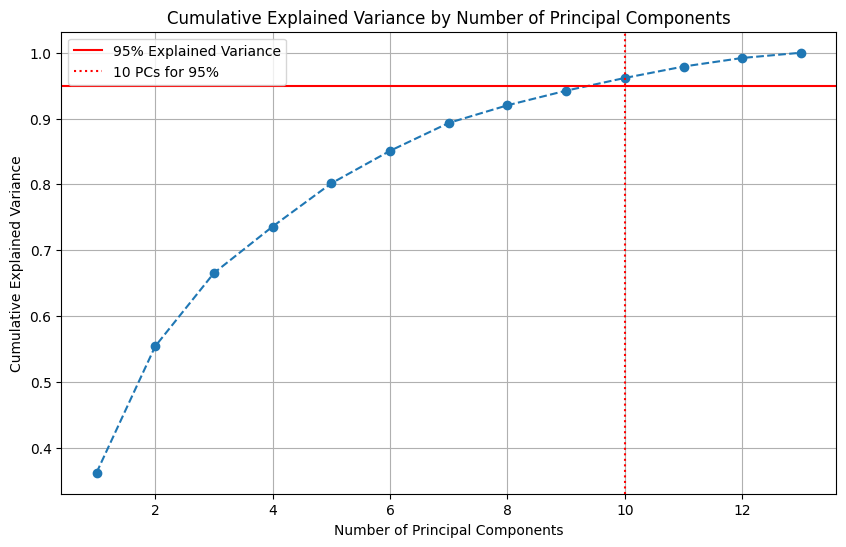

In [7]:
# 4. Analyze Principal Components

# Explained Variance Ratio
# This tells us how much variance each principal component explains.
explained_variance_ratio = pca.explained_variance_ratio_
print("\nExplained Variance Ratio of the first 2 Principal Components:")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"  PC{i+1}: {ratio:.4f} ({ratio*100:.2f}%)")
print(f"Cumulative Explained Variance (2 PCs): {explained_variance_ratio.sum():.4f} ({explained_variance_ratio.sum()*100:.2f}%)")

# Principal Components (Loadings/Eigenvectors)
# These are the linear combinations of the original features that form the PCs.
# They indicate how much each original feature contributes to each principal component.
components_df = pd.DataFrame(pca.components_, columns=feature_names, index=['Principal Component 1', 'Principal Component 2'])
print("\nPrincipal Components (Loadings - how original features contribute to PCs):")
print(components_df)
# For example, look at PC1: features with larger absolute values contribute more to PC1.
# High 'flavanoids' and 'proanthocyanins' (negative contribution) seem to strongly influence PC1.

# Re-run PCA to see cumulative explained variance for all components
pca_full = PCA()
pca_full.fit(X_scaled)
explained_variance_full = pca_full.explained_variance_ratio_

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_full) + 1), explained_variance_full.cumsum(), marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='-', label='95% Explained Variance')
plt.axvline(x=np.argmax(explained_variance_full.cumsum() >= 0.95) + 1, color='r', linestyle=':', label=f'{np.argmax(explained_variance_full.cumsum() >= 0.95) + 1} PCs for 95%')
plt.legend()
plt.show()

# Visualize the Results (2D PCA Plot):

We plot the transformed data (`X_pca`) where the x-axis is PC1 and the y-axis is PC2.
We color-code the points by their original target class (wine cultivar).
This plot beautifully demonstrates PCA's power: the three distinct wine cultivars are clearly separated in this reduced 2-dimensional space, even though the original data had 13 dimensions! This suggests that PC1 and PC2 capture the most significant variations that differentiate these wine types.

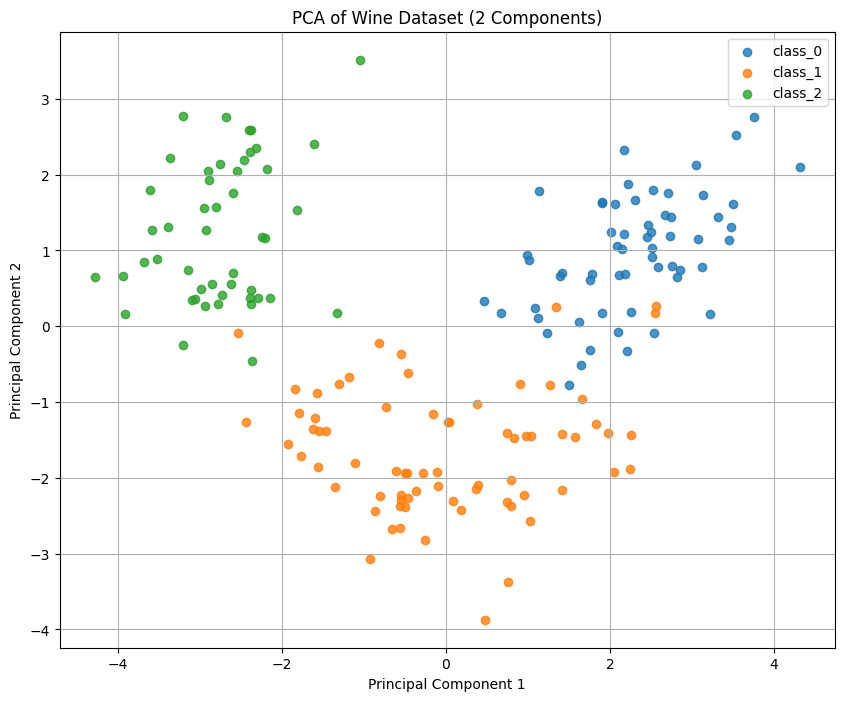

In [8]:
# 5. Visualize the Results (2D PCA Plot)
plt.figure(figsize=(10, 8))
for i, target_name in enumerate(target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], label=target_name, alpha=0.8)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Wine Dataset (2 Components)')
plt.legend()
plt.grid(True)
plt.show()

# Interpretation of the 2D plot:
# You can clearly see that the three wine cultivars (classes) are largely separated
# based on the first two principal components. This indicates that the
# variation explained by these two components is highly effective in distinguishing
# between the wine types. PC1 seems to be the primary discriminator.